In [1]:
import os, sys
import xarray as xr
import numpy as np
import pandas as pd
import re

# Path to modules
sys.path.append('modules/')
import globalvars
from wrf_utils import load_preprocessed_WRF_data

In [2]:
model='cfsr'
varname='snow'
# --- read the non-anomaly data ---
ds = load_preprocessed_WRF_data(model, varname, anomaly=False)
ds

<xarray.Dataset> Size: 19GB
Dimensions:  (time: 14600, y: 250, x: 320)
Coordinates:
    lat      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    lon      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
  * time     (time) datetime64[ns] 117kB 1980-01-01 1980-01-02 ... 2019-12-31
Dimensions without coordinates: y, x
Data variables:
    snow     (time, y, x) float32 5GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
    snowh    (time, y, x) float32 5GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
    snowc    (time, y, x) float32 5GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
    pcpt     (time, y, x) float32 5GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
Attributes:
    contact:  rtladerjr@alaska.edu
    info:     Alaska CASC
    data:     Downscaled CFSR
    format:   version 1
    date:     Tue Dec 11 10:35:26 AKST 2018

In [2]:
from pathlib import Path
data_path = Path(globalvars.path_to_data) / 'downloads' / 'SEAK-WRF' / 'geo_southeast.nc'
elev = xr.open_dataset(data_path)
elev

<xarray.Dataset> Size: 87MB
Dimensions:     (Time: 1, south_north: 250, west_east: 320,
                 south_north_stag: 251, west_east_stag: 321, land_cat: 21,
                 soil_cat: 16, month: 12, num_urb_params: 132,
                 dust_erosion_dimension: 3)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month,
                                num_urb_params, dust_erosion_dimension
Data variables: (12/57)
    Times       (Time) |S19 19B ...
    XLAT_M      (Time, south_north, west_east) float32 320kB ...
    XLONG_M     (Time, south_north, west_east) float32 320kB ...
    XLAT_V      (Time, south_north_stag, west_east) float32 321kB ...
    XLONG_V     (Time, south_north_stag, west_east) float32 321kB ...
    XLAT_U      (Time, south_north, west_east_stag) float32 321kB ...
    ...          ...
    VAR_SSO     (Time, south_north, west_east) float32 320kB ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 320kB ...
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 42MB ...
    EROD        (Time, dust_erosion_dimension, south_north, west_east) float32 960kB ...
    CLAYFRAC    (Time, south_north, west_east) float32 320kB ...
    SANDFRAC    (Time, south_north, west_east) float32 320kB ...
Attributes: (12/52)
    TITLE:                           OUTPUT FROM GEOGRID V4.0
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        321
    SOUTH-NORTH_GRID_DIMENSION:      251
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_VAR_SSO:                    1
    FLAG_LAKE_DEPTH:                 1
    FLAG_URB_PARAM:                  1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

In [3]:
import geopandas as gpd
fp = globalvars.path_to_data + 'downloads/AK_climate_divisions/AK_divisions_NAD83.shp'
polys = gpd.read_file(fp, crs="epsg:3857") # have to manually set the projection

## subset to only keep Northwest Gulf, North Panhandle, Central Panhandle, South Panhandle
polys

/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


,OBJECTID_1,OBJECTID,FEATURE,Name,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,2,West Coast,1.128037e+07,112.739937,49.954952,"MULTIPOLYGON (((-161.82027 59.01538, -161.8258..."
1,2,2,13,Aleutians,6.054649e+06,60.271068,3.376894,"MULTIPOLYGON (((179.38461 51.40521, 179.45994 ..."
2,3,3,3,Central Interior,4.274850e+06,42.875692,54.800225,"POLYGON ((-152.96629 62.26623, -153.46877 62.0..."
3,4,4,1,North Slope,7.078976e+06,66.637774,50.350210,"MULTIPOLYGON (((-145.81666 70.15304, -145.8071..."
4,5,5,4,Northeast Interior,2.441671e+06,25.943568,29.308303,"POLYGON ((-141.00582 64.74928, -141.54433 64.9..."
5,6,6,5,Southeast Interior,2.374846e+06,24.722029,34.048991,"POLYGON ((-141.00539 62.49923, -141.00499 60.8..."
6,7,7,6,Cook Inlet,2.836497e+06,29.127693,11.579571,"POLYGON ((-147.64176 61.37136, -148.14689 61.2..."
7,8,8,8,Northwest Gulf,9.778165e+06,100.715644,6.417068,"MULTIPOLYGON (((-155.60038 55.75543, -155.6024..."
8,9,9,7,Bristol Bay,3.489349e+06,36.428685,20.353770,"MULTIPOLYGON (((-160.27301 55.8296, -160.3104 ..."
9,10,10,10,North Panhandle,6.495015e+05,6.945267,0.863277,"POLYGON ((-134.34302 58.9864, -134.42566 58.93..."


In [2]:
path_to_wrf = '/cw3e/mead/projects/cwp140/data/downloads/SEAK-WRF/cfsr/WRFDS_2019-12-31.nc'
ds = xr.open_dataset(path_to_wrf)
ds

<xarray.Dataset> Size: 31MB
Dimensions:        (south_north: 250, west_east: 320, Time: 1,
                    interp_levels: 9, soil_layers_stag: 4)
Coordinates:
    XLAT           (south_north, west_east) float32 320kB ...
    XLONG          (south_north, west_east) float32 320kB ...
  * Time           (Time) datetime64[ns] 8B 2019-12-31
  * interp_levels  (interp_levels) float32 36B 100.0 200.0 300.0 ... 925.0 1e+03
Dimensions without coordinates: south_north, west_east, soil_layers_stag
Data variables: (12/37)
    lat            (south_north, west_east) float32 320kB ...
    lon            (south_north, west_east) float32 320kB ...
    SLP            (Time, south_north, west_east) float32 320kB ...
    PSFC           (Time, south_north, west_east) float32 320kB ...
    U10            (Time, south_north, west_east) float32 320kB ...
    V10            (Time, south_north, west_east) float32 320kB ...
    ...             ...
    QVAPOR         (Time, interp_levels, south_north, west_east) float32 3MB ...
    CLDFRA         (Time, interp_levels, south_north, west_east) float32 3MB ...
    GHT            (Time, interp_levels, south_north, west_east) float32 3MB ...
    SH2O           (Time, soil_layers_stag, south_north, west_east) float32 1MB ...
    SMOIS          (Time, soil_layers_stag, south_north, west_east) float32 1MB ...
    TSLB           (Time, soil_layers_stag, south_north, west_east) float32 1MB ...
Attributes:
    contact:  rtladerjr@alaska.edu
    info:     Alaska CASC
    data:     Downscaled CFSR
    format:   version 2
    date:     Tue Jun  2 08:23:30 AKDT 2020

In [1]:
import pandas as pd
fname = 'out/landslide_summary_strict.csv'
df = pd.read_csv(fname)

ros_perc = (df['max_ros'].sum() / df['max_ros'].count())*100.
ar_perc = (df['max_ar'].sum() / df['max_ar'].count())*100.

print(f"ROS: {ros_perc}%, AR: {ar_perc}%")

ROS: 7.792207792207792%, AR: 90.9090909090909%


In [10]:
# --- Load landslide database ---
fname = globalvars.path_to_data + 'downloads/SEAK_News_Reported_Landslides.csv'
df = pd.read_csv(fname)
df = df.set_index(pd.to_datetime(df['Day_min'], format='%m/%d/%y', errors='coerce'))
df = df.loc[(df.index >= '1980-01-01') & (df.index <= '2019-12-31')]

# --- Iterate through landslides ---
for i, row in df.iterrows():
    start_date = pd.to_datetime(row['Day_min'], format='%m/%d/%y', errors='coerce') - pd.Timedelta(days=1)
    end_date = pd.to_datetime(row['Day_max'], format='%m/%d/%y', errors='coerce') + pd.Timedelta(days=1)
    lat = row['Lat']
    lon = row['Lon']
    break

In [2]:
start_date, end_date = "2019-10-24", "2019-10-26"

In [9]:
import sys
import xarray as xr
sys.path.append('modules/')
import globalvars
# --- Load AR dataset once ---
ar_ds = xr.open_dataset(globalvars.path_to_data + 'downloads/globalARcatalog_ERA5_1940-2024_v4.0.nc')
ar_ds = ar_ds.kidmap.squeeze()
ar_ds = ar_ds.assign_coords({"lon": (((ar_ds.lon + 180) % 360) - 180)}).sortby('lon')
ar = ar_ds.sel(time=slice(start_date, end_date))
ar = ar.sel(lat=slice(70, 50), lon=slice(-140, -130))
# # ar = ar.sel(lat=lat, lon=lon, method='nearest')
# ar = ar.sel(lat=slice(lat+1, lat-1), lon=slice(lon-1, lon+1))
# ar = ar.resample(time="1D").max(["lat", "lon"])
# ar
# ar_mask = (ar > 0).values.squeeze()

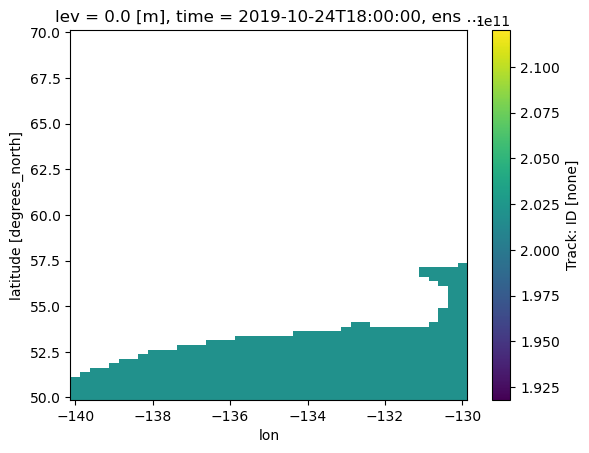

In [13]:
ar.isel(time=3).plot()

In [2]:
import xarray as xr
import numpy as np

da = xr.DataArray([10, 12, 20, 30], dims='time')
diff = xr.concat([xr.DataArray([np.nan]), da.diff(dim='time')], dim='time')
print(diff)


<xarray.DataArray (dim_0: 1, time: 4)> Size: 32B
array([[nan,  2.,  8., 10.]])
Dimensions without coordinates: dim_0, time


In [4]:
varname = 'snow' ## 'ivt' or '700z'
model = 'ccsm'
ds = load_preprocessed_WRF_data(model, varname, anomaly=False)
ds

<xarray.Dataset> Size: 11GB
Dimensions:  (time: 11315, y: 250, x: 320)
Coordinates:
    lat      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    lon      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
  * time     (time) datetime64[ns] 91kB 2030-01-01 2030-01-02 ... 2060-12-31
Dimensions without coordinates: y, x
Data variables:
    snow     (time, y, x) float32 4GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
    snowh    (time, y, x) float32 4GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
    snowc    (time, y, x) float32 4GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
Attributes:
    contact:  rtladerjr@alaska.edu
    info:     Alaska CASC
    data:     Downscaled GFDL
    format:   version 1
    date:     Tue Apr 23 17:56:28 AKDT 2019

In [5]:
rain = load_preprocessed_WRF_data(model, 'pcpt', anomaly=False)
rain

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 11315, y: 250, x: 320)
Coordinates:
    lat      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    lon      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
  * time     (time) datetime64[ns] 91kB 2030-01-01 2030-01-02 ... 2060-12-31
Dimensions without coordinates: y, x
Data variables:
    pcpt     (time, y, x) float32 4GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>
Attributes:
    contact:  rtladerjr@alaska.edu
    info:     Alaska CASC
    data:     Downscaled GFDL
    format:   version 1
    date:     Tue Apr 23 17:56:28 AKDT 2019

In [6]:
ds = xr.merge([ds, rain])

/scratch/dnash/job_1177036/ipykernel_600747/3218586607.py:1: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.merge([ds, rain])
/scratch/dnash/job_1177036/ipykernel_600747/3218586607.py:1: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.merge([ds, rain])


<xarray.Dataset> Size: 7GB
Dimensions:  (y: 250, x: 320, time: 11315)
Coordinates:
    lat      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    lon      (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
  * time     (time) datetime64[ns] 91kB 2030-01-01 2030-01-02 ... 2060-12-31
Dimensions without coordinates: y, x
Data variables:
    mask     (time, y, x) int64 7GB dask.array<chunksize=(1, 250, 320), meta=np.ndarray>

In [4]:

### Constants ###
outdir = '/expanse/nfs/cw3e/cwp140/preprocessed/SEAK-WRF/{0}/{1}/'.format(model, varname)
datadir = '/expanse/nfs/cw3e/cwp140/preprocessed/SEAK-WRF/{0}/{1}/'.format(model, varname)
fmt = '.nc'

print('Step 1: Reading data...')
filename_pattern = datadir + 'WRFDS_{0}_*.nc'.format(varname)
print(filename_pattern)
ds = xr.open_mfdataset(filename_pattern,
                       engine='netcdf4',
                       combine='by_coords')

print('ds size in GB {:0.2f}\n'.format(ds.nbytes / 1e9))
ds = ds.sortby('Time')
ds

Step 1: Reading data...
/expanse/nfs/cw3e/cwp140/preprocessed/SEAK-WRF/CCSM/ivt/WRFDS_ivt_*.nc
ds size in GB 25.35



<xarray.Dataset>
Dimensions:  (Time: 11315, south_north: 250, west_east: 320)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    XLONG    (Time, south_north, west_east) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
  * Time     (Time) datetime64[ns] 2030-01-01 2030-01-02 ... 2060-12-31
Dimensions without coordinates: south_north, west_east
Data variables:
    ivtu     (Time, south_north, west_east) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivtv     (Time, south_north, west_east) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    ivt      (Time, south_north, west_east) float32 dask.array<chunksize=(365, 250, 320), meta=np.ndarray>
    lat      (Time, south_north, west_east) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>
    lon      (Time, south_north, west_east) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>

In [5]:
ds.Time

<xarray.DataArray 'Time' (Time: 11315)>
array(['2030-01-01T00:00:00.000000000', '2030-01-02T00:00:00.000000000',
       '2030-01-03T00:00:00.000000000', ..., '2060-12-29T00:00:00.000000000',
       '2060-12-30T00:00:00.000000000', '2060-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 2030-01-01 2030-01-02 ... 2060-12-31

In [6]:
clim_path = outdir + 'filtered_daily_mean_clim_' + varname + fmt
filtered_clim = xr.open_dataset(clim_path)
filtered_clim

<xarray.Dataset>
Dimensions:    (dayofyear: 366, south_north: 250, west_east: 320)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Dimensions without coordinates: south_north, west_east
Data variables:
    ivtu       (south_north, west_east, dayofyear) float64 ...
    ivtv       (south_north, west_east, dayofyear) float64 ...
    ivt        (south_north, west_east, dayofyear) float64 ...
    lat        (south_north, west_east, dayofyear) float64 ...
    lon        (south_north, west_east, dayofyear) float64 ...

In [8]:
anomalies = ds.unify_chunks().groupby('Time.dayofyear') - filtered_clim
anomalies

/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 31 times more chunks
  return self.array[key]


<xarray.Dataset>
Dimensions:    (Time: 11315, south_north: 250, west_east: 320)
Coordinates:
    XLAT       (Time, south_north, west_east) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>
    XLONG      (Time, south_north, west_east) float32 dask.array<chunksize=(183, 125, 160), meta=np.ndarray>
  * Time       (Time) datetime64[ns] 2030-01-01 2030-01-02 ... 2060-12-31
    dayofyear  (Time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365 366
Dimensions without coordinates: south_north, west_east
Data variables:
    ivtu       (Time, south_north, west_east) float64 dask.array<chunksize=(1, 125, 160), meta=np.ndarray>
    ivtv       (Time, south_north, west_east) float64 dask.array<chunksize=(1, 125, 160), meta=np.ndarray>
    ivt        (Time, south_north, west_east) float64 dask.array<chunksize=(1, 125, 160), meta=np.ndarray>
    lat        (Time, south_north, west_east) float64 dask.array<chunksize=(1, 125, 160), meta=np.ndarray>
    lon        (Time, south_north, west_east) float64 dask.array<chunksize=(1, 125, 160), meta=np.ndarray>

In [ ]:
model = 'CCSM'
path_to_wrf = '/expanse/lustre/scratch/dnash/temp_project/downloaded/WRF/'
path_to_out = '/expanse/lustre/scratch/dnash/temp_project/preprocessed/'
### START PROGRAM ###
start_yr = 2030
end_yr = 2060

## Loop through all above years
for year in np.arange(start_yr, end_yr+1):
    print('Processing ...', year)
    
    # get list of filenames that contain data from that year from current year folder
    filenames = []
    for name in glob.glob(path_to_wrf + '{0}/WRFDS_*'.format(str(year))):
        filenames.append(name)
    # sort filenames so they are in chronological order
    filenames = sorted(filenames)
    
    ds_lst = []
    for i, wrfin in enumerate(filenames):
        ds = xr.open_dataset(path_to_data + fname)

        if varname == 'ivt':
            ds = preprocess_WRF_ivt(ds, fname)
            ds_lst.append(ds)

    new_ds = xr.concat(ds_lst, dim='Time')
    
    # write to netCDF
    print('Writing', output_varname, ' to netCDF')
    fname = os.path.join(path_to_out, 'SEAK-WRF/{2}/{0}/WRFDS_{0}_{1}.nc').format(output_varname, str(year), model)
    ds.to_netcdf(path=fname, mode = 'w', format='NETCDF4')

In [5]:
path_to_data = '/expanse/lustre/scratch/dnash/temp_project/downloaded/WRF/'
fname = 'WRFDS_2030-01-01.nc'
ds = xr.open_dataset(path_to_data + fname)
ds = preprocess_WRF_ivt(ds, fname)

fname = 'WRFDS_2030-01-02.nc'
ds2 = xr.open_dataset(path_to_data + fname)
ds2 = preprocess_WRF_ivt(ds2, fname)



Masking values below surface ....
Masking values below surface ....


In [7]:
filepath = '/expanse/lustre/scratch/dnash/temp_project/preprocessed/SEAK-WRF/CCSM/ivt/'
fname = 'WRFDS_ivt_2030.nc'
ds = xr.open_dataset(filepath+fname)
ds

<xarray.Dataset>
Dimensions:  (Time: 365, south_north: 250, west_east: 320)
Coordinates:
    XTIME    (Time) float32 ...
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
  * Time     (Time) datetime64[ns] 2030-01-01 2030-01-02 ... 2030-12-31
Dimensions without coordinates: south_north, west_east
Data variables:
    ivtu     (Time, south_north, west_east) float32 ...
    ivtv     (Time, south_north, west_east) float32 ...
    ivt      (Time, south_north, west_east) float32 ...
    lat      (Time, south_north, west_east) float32 ...
    lon      (Time, south_north, west_east) float32 ...

In [6]:
import os, sys
import numpy as np
import itertools
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import colorsys
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
import matplotlib.patches as mpatches
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import seaborn as sns
import cmocean.cm as cmo
from datetime import timedelta
import textwrap
from matplotlib.gridspec import GridSpec
import itertools ## need this for the cbarticks

## import personal modules
sys.path.append('modules')
import cw3ecmaps as ccmaps
from plotter import draw_basemap

# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.PlateCarree() ## the projection you want your map displayed in
ext = [-148., -126., 54, 61]

# Set tick/grid locations
tx = 2
ty = 2
dx = np.arange(ext[0],ext[1]+tx,tx)
dy = np.arange(ext[2],ext[3]+ty,ty)

nrows = 2
ncols = 1

## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(nrows, ncols, height_ratios=[1, 0.05], width_ratios = [1], wspace=0.01, hspace=0.2)
## use gs[rows index, columns index] to access grids

fig = plt.figure(figsize=(8, 9.))
fig.dpi = 300
fname = 'figs/test_ivt'
fmt = 'png'

ax = fig.add_subplot(gs[0, 0], projection=mapcrs)

ax = draw_basemap(ax, extent=ext, xticks=dx, yticks=dy,
                  left_lats=True, right_lats=False, bottom_lons=True)
ax.set_extent(ext, datacrs)
ax.add_feature(cfeature.STATES, edgecolor='0.4', linewidth=0.8)

## add filled contours
cmap, norm, bnds, cbarticks, cbarlbl = ccmaps.cmap('ivt') # get cmap from our custom function
cf = ax.contourf(ds.lon.values, ds.lat.values, ds.ivt.values, transform=datacrs,
                 levels=bnds, cmap=cmap, norm=norm, alpha=0.9)

# Wind barbs / vectors 
uvec_mask = ds.ivtu.where((ds.ivt >=250.)).values # mask values where IVT magnitude is less than 250 kg m-1 s-1
vvec_mask = ds.ivtv.where((ds.ivt >=250.)).values # mask values where IVT magnitude is less than 250 kg m-1 s-1

Q = ax.quiver(ds.lon.values, ds.lat.values, uvec_mask, vvec_mask, transform=datacrs, 
          color='k', regrid_shape=30,
          angles='xy', scale_units='xy', scale=500, units='xy')

# quiver key
qk = ax.quiverkey(Q, 0.8, -0.1, 250, '250 kg/m/s', labelpos='E',
                  coordinates='axes', fontproperties={'size': 6.0})

# Add color bar
cbax = plt.subplot(gs[-1, :]) # colorbar axis (last row, all columns)
cbarticks = list(itertools.compress(bnds, cbarticks)) ## this labels the cbarticks based on the cmap dictionary
cb = Colorbar(ax = cbax, mappable = cf, orientation = 'horizontal', ticklocation = 'bottom', ticks=cbarticks)
cb.set_label(cbarlbl, fontsize=11)
cb.ax.tick_params(labelsize=12)

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=True)
fig.clf()

<Figure size 2400x2700 with 0 Axes>

In [4]:
# path_to_data = '/data/downloaded/Forecasts/MPAS/combined_ivt/combined_year/'
# fname = 'ivt_mpas_current_1988.nc'
# ds = xr.open_dataset(path_to_data + fname)
# ds

<xarray.Dataset>
Dimensions:  (ens: 1, time: 1, lev: 1636, lat: 141, lon: 301)
Coordinates:
  * lon      (lon) float64 120.0 120.5 121.0 121.5 ... 268.5 269.0 269.5 270.0
  * lat      (lat) float64 10.0 10.5 11.0 11.5 12.0 ... 78.0 78.5 79.0 79.5 80.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 ... 1.634e+03 1.635e+03 1.636e+03
  * time     (time) datetime64[ns] 1988-04-01
  * ens      (ens) int32 0
Data variables:
    ivt      (ens, time, lev, lat, lon) float32 ...
    ivtx     (ens, time, lev, lat, lon) float32 ...
    ivty     (ens, time, lev, lat, lon) float32 ...